In [1]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Scrap data

## I find another good source which includes all hourly data in Champaign WI airport and also some other cities in United states
## Link:https://mrcc.illinois.edu/CLIMATE/Hourly/StnHourBTD2.jsp

# Explore data

In [2]:
pop = pd.read_csv('Flipped Files/wg-KCMI-pop.csv')
pd.DataFrame(pop['Hour1'].values.reshape((9688,1)) - pop[pop.columns[4:]].values).mean() # difference between hour 1 prediction and other prediction

0      -0.133290
1      -0.661631
2      -1.293634
3      -2.774819
4      -3.815778
5      -4.351262
6      -4.398045
7      -4.382014
8      -4.310549
9      -4.321939
10     -4.342895
11     -4.405652
12     -4.536092
13     -4.612743
14     -4.674516
15     -4.723800
16     -4.785714
17     -4.869589
18     -4.883208
19     -4.871515
20     -4.843822
21     -4.853742
22     -4.857710
23     -4.831459
24     -4.791000
25     -4.810721
26     -4.853139
27     -4.978817
28     -5.028477
29     -5.033793
         ...    
209   -10.596247
210   -10.685776
211   -10.714043
212   -10.739622
213   -10.695667
214   -10.720023
215   -10.793712
216   -10.842516
217   -10.950905
218   -11.300373
219   -11.798529
220   -12.384511
221   -12.838070
222   -13.198121
223   -13.506908
224   -13.871815
225   -14.196625
226   -14.481758
227   -14.809178
228   -15.117960
229   -15.410065
230   -15.497279
231   -15.523637
232   -15.498186
233   -15.487929
234   -15.522444
235   -15.567347
236   -15.5643

In [3]:
temp = pd.read_csv('Flipped Files/wg-KCMI-temp.csv')
df = pd.DataFrame(temp['Hour1'].values.reshape((9688,1)) - temp[temp.columns[4:]].values).quantile([0.1,0.2,0.5,0.8,0.9])

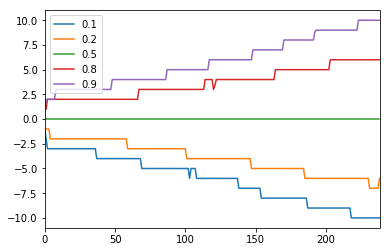

In [4]:
df.T.plot()

## script

In [5]:
pop = pd.read_csv('Flipped Files/wg-KCMI-pop.csv')
pop.head() # This is what precipatation files looks like by originnal flipper function

,Location,Variable,Date/Time,Hour1,Hour2,Hour3,Hour4,Hour5,Hour6,Hour7,...,Hour231,Hour232,Hour233,Hour234,Hour235,Hour236,Hour237,Hour238,Hour239,Hour240
0,KCMI,PoP,2016-03-03-19,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KCMI,PoP,2016-03-03-20,1.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KCMI,PoP,2016-03-03-21,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KCMI,PoP,2016-03-03-22,0.0,0.0,0.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KCMI,PoP,2016-03-03-23,0.0,0.0,0.0,0.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
kcmi = pd.read_csv('wg-KCMI.csv')

/home/guangya/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
# This functions requrires a df with columns of datetime index, daybefore the prediction, the variable we want to investigate, and the locations
def flipper(df,date,daybefore,var,location):
    df.index += 1
    df.loc[0] = kcmi.columns
    df.columns = range(len(kcmi.columns)) # data cleaning on wg data
    s1 = df.groupby(daybefore)[date].apply(list) # date corrorsponds to the column name of date
    s2 = df.groupby(daybefore)[var].apply(list) # var corrosponds to the column name = Varible that we want to investigate
    temp = pd.concat([s1, s2], axis=1)
    temp = temp.T.apply(lambda x: dict(zip(x[2], x[3])))
    df = pd.DataFrame(np.nan, index=temp.index, columns=range(1,241))
    dict_col = [dict() for i in range(len(temp))]
    i = 0
    for x in temp.values:
        for k,v in x.items():
            k = int(k)
            dict_col[i][k-1] = int(v) # I do not understand why this happens. Might be a bug for pandas
        i += 1
    for i in range(len(dict_col)):
        k = list(dict_col[i].keys())
        v = list(dict_col[i].values())
        df.iloc[i,k] = v
    df['Location'] = location
    df['Variable'] = var
    df.index = pd.to_datetime(df.index)
    return df

In [8]:
flipper(kcmi,2,1,3,'KCMI') # this is what it looks like by my flipper function. Noted that 1,2,3 here are column names

,1,2,3,4,5,6,7,8,9,10,...,233,234,235,236,237,238,239,240,Location,Variable
1,,,,,,,,,,,,,,,,,,,,,
2016-03-03 19:00:00,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KCMI,3
2016-03-03 20:00:00,34.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KCMI,3
2016-03-03 21:00:00,33.0,33.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KCMI,3
2016-03-03 22:00:00,32.0,32.0,34.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KCMI,3
2016-03-03 23:00:00,31.0,33.0,33.0,33.0,33.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KCMI,3
2016-03-04 00:00:00,31.0,32.0,32.0,32.0,32.0,32.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KCMI,3
2016-03-04 01:00:00,30.0,31.0,31.0,31.0,31.0,31.0,31.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KCMI,3
2016-03-04 02:00:00,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KCMI,3
2016-03-04 03:00:00,30.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KCMI,3


In [9]:
temp # This is what termperature  files looks like by originnal flipper function

,Location,Variable,Date/Time,Hour1,Hour2,Hour3,Hour4,Hour5,Hour6,Hour7,...,Hour231,Hour232,Hour233,Hour234,Hour235,Hour236,Hour237,Hour238,Hour239,Hour240
0,KCMI,Temp,2016-03-03-19,37.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KCMI,Temp,2016-03-03-20,34.0,35.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KCMI,Temp,2016-03-03-21,33.0,33.0,35.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KCMI,Temp,2016-03-03-22,32.0,32.0,34.0,34.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KCMI,Temp,2016-03-03-23,31.0,33.0,33.0,33.0,33.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,KCMI,Temp,2016-03-04-00,31.0,32.0,32.0,32.0,32.0,32.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,KCMI,Temp,2016-03-04-01,30.0,31.0,31.0,31.0,31.0,31.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,KCMI,Temp,2016-03-04-02,30.0,30.0,30.0,30.0,30.0,30.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,KCMI,Temp,2016-03-04-03,30.0,29.0,29.0,29.0,29.0,29.0,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,KCMI,Temp,2016-03-04-04,30.0,29.0,28.0,28.0,28.0,28.0,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Statistic summary for other areas

### By checking at wunderground webiste, I found that the station in wunderground is generally different from the station in national weather report, so I use the general ones as the alternative.

In [10]:
def clean(true_df): # clean the wather statation data
    true_df = true_df.drop(columns='Unnamed: 4')
    true_df['Date'] = pd.to_datetime(true_df.T.apply(lambda x: (x['Date'] + '-' + x['Time']))).dt.round(freq = '60min')
    true_df = true_df.drop(columns='Time')
    return true_df # C
def merge_pop(true_df,pop,cutoff = 0): # merge flipped pop with true df 
    pop['Date/Time'] = pd.to_datetime(pop['Date/Time'])
    pop = pop.merge(true_df,how='inner',left_on='Date/Time',right_on='Date') # No need to make a dict since if they are missing, then it's m, which we will handle later.
    pop = pop.drop(columns = pop.columns[-2])
    pop = pop.drop(columns = 'Date')
    print(pop.shape) 
    pop = pop[pop['Precip (in)'] != 'm'] # Missing data
    pop['Precip (in)'] = pop['Precip (in)'].astype('float') # convert to int
    pop['Precip (in)'] = pop['Precip (in)'].apply(lambda x: 1 if x > cutoff else 0) # define cutoffs here; if > 0 then it means it's raining
    return pop
def merge_temp(true_df,temp):
    temp['Date/Time'] = pd.to_datetime(temp['Date/Time'])
    temp = temp.merge(true_df,how='inner',left_on='Date/Time',right_on='Date') # 
    temp = temp.drop(columns = temp.columns[-1])
    temp = temp.drop(columns = 'Date')
    print(temp.shape)
    temp = temp[temp['Temp (F)'] != 'M'] # Missing data or replace this with hour 1 prediction
    temp['Temp (F)'] = temp['Temp (F)'].astype('int') # convert to int
    return temp
def get_temp_error(temp,hour1 = False): # Get the error table; can adjust whether use hour1 as the true value or not
    if(hour1):
        temp_error =  pd.DataFrame(temp['Hour1'].values.reshape((len(temp),1)) - temp[temp.columns[3:-1]].values)
    else:
         temp_error = pd.DataFrame(temp['Temp (F)'].values.reshape((len(temp),1)) - temp[temp.columns[3:]].values)
    temp_error.index = temp['Date/Time']
    return temp_error
def get_pop_error(pop,cutoff = 16,hour1 = False):
    if(hour1):
        x = pop[pop.columns[3:-1]].values
        np.putmask(x, x < cutoff, 0)
        np.putmask(x, x >= cutoff, 1)
        result = pd.DataFrame(x,columns = pop.columns[3:-1])
        pop_error = pd.DataFrame(pop['Hour1'].values.reshape((len(result),1)) - result.values)
    else:
        x = pop[pop.columns[3:-1]].values
        np.putmask(x, x < cutoff, 0)
        np.putmask(x, x >= cutoff, 1)
        result = pd.DataFrame(x,columns = pop.columns[3:-1])
        pop_error = pd.DataFrame(pop['Precip (in)'].values.reshape((len(result),1)) - result.values)
    pop_error.index = pop['Date/Time']
    return pop_error
def error_month(temp_error): # plot
    labels = range(1,13)
    plt.figure(figsize = (20,10))
    for i in range(12):
        df = temp_error[temp_error.index.month == i+1].abs().mean()
        plt.plot(df,label = labels[i])
    plt.legend()
def merge_temp_replace(true_df,temp):# Missing data or replace this with hour 1 prediction
    temp['Date/Time'] = pd.to_datetime(temp['Date/Time'])
    temp = temp.merge(true_df,how='inner',left_on='Date/Time',right_on='Date') # 
    temp = temp.drop(columns = temp.columns[-1])
    temp = temp.drop(columns = 'Date')
    print(temp.shape)
    temp.loc[temp['Temp (F)'] == 'M','Temp (F)'] = temp[temp['Temp (F)'] == 'M']['Hour1'] 
    temp['Temp (F)'] = temp['Temp (F)'].astype('int') # convert to int
    return temp
def merge_pop_replace(true_df,pop,cutoff = 0): # cutoff is to determine how many precipatation is considered to be rainy
    pop['Date/Time'] = pd.to_datetime(pop['Date/Time'])
    pop = pop.merge(true_df,how='inner',left_on='Date/Time',right_on='Date') # No need to make a dict since if they are missing, then it's m, which we will handle later.
    pop = pop.drop(columns = pop.columns[-2])
    pop = pop.drop(columns = 'Date')
    print(pop.shape) 
    pop.loc[pop['Precip (in)'] == 'm','Precip (in)'] = pop[pop['Precip (in)'] == 'm']['Hour1']# Missing data
    pop['Precip (in)'] = pop['Precip (in)'].astype('float') # convert to int
    pop['Precip (in)'] = pop['Precip (in)'].apply(lambda x: 1 if x > cutoff else 0) # define cutoffs here; if > 0 then it means it's raining
    return pop
def brier_score(pop):
    y = pop[['Hour1','Precip (in)']].dropna().values
    return brier_score_loss(y[:,1],y[:,0] / 100)

### re-do Champaign using functions above

In [11]:
kcmi = pd.read_csv('KCMI-POP-TEMP-REAL.csv')
pop_kcmi = pd.read_csv('Flipped Files/wg-KCMI-pop.csv')
temp_kcmi = pd.read_csv('Flipped Files/wg-KCMI-temp.csv')

In [12]:
kcmi[kcmi['Temp (F)'] == 'M'] # missing value

,Date,Time,Temp (F),Precip (in),Unnamed: 4
8411,2016-12-20,11:53,M,0.00,NaN
10210,2017-03-05,10:53,M,0.00,NaN
12910,2017-06-25,22:53,M,0.00,NaN
12911,2017-06-25,23:53,M,0.00,NaN
12912,2017-06-26,00:53,M,0.00,NaN
12913,2017-06-26,01:53,M,0.00,NaN
12914,2017-06-26,02:53,M,0.00,NaN
12915,2017-06-26,03:53,M,0.00,NaN
12916,2017-06-26,04:53,M,0.00,NaN
13505,2017-07-20,17:53,M,0.00,NaN


In [13]:
kcmi[kcmi['Precip (in)'] == 'm']

,Date,Time,Temp (F),Precip (in),Unnamed: 4
73,2016-01-08,01:51,39,m,NaN
78,2016-01-08,06:51,41,m,NaN
79,2016-01-08,07:51,41,m,NaN
82,2016-01-08,10:51,46,m,NaN
85,2016-01-08,13:51,46,m,NaN
86,2016-01-08,14:51,46,m,NaN
87,2016-01-08,15:51,46,m,NaN
95,2016-01-08,23:51,45,m,NaN
106,2016-01-09,10:51,39,m,NaN
110,2016-01-09,14:51,37,m,NaN


In [14]:
kcmi = clean(kcmi)
pop_kcmi = merge_pop(kcmi,pop_kcmi)
temp_kcmi = merge_temp(kcmi,temp_kcmi)
temp_kcmi_error = get_temp_error(temp_kcmi)
pop_kcmi_error = get_pop_error(pop_kcmi)
# could adjust the parameters here to see different results

(9688, 244)
(9688, 244)


/home/guangya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in less
/home/guangya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater_equal


In [15]:
pop_kcmi_error[1].value_counts()

 0.0    8061
-1.0     660
 1.0      79
Name: 1, dtype: int64

In [16]:
pop_kcmi['Precip (in)'].value_counts()

0    8740
1     474
Name: Precip (in), dtype: int64

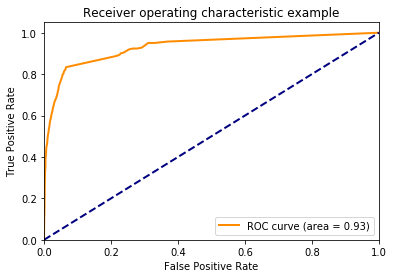

In [19]:
from sklearn.metrics import brier_score_loss
from sklearn.metrics import roc_curve, auc
# Roc Curve
y = pop_kcmi[['Hour1','Precip (in)']].dropna().values
fpr, tpr, thresholds = roc_curve(y[:,1], y[:,0], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [20]:
thresholds[np.argmax(tpr - fpr)] # The best cutoff 

16.0

Text(0.5,1,'2-class Precision-Recall curve: AP=0.62')

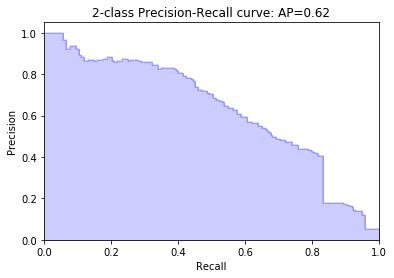

In [21]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature

precision, recall, _ = precision_recall_curve(y[:,1], y[:,0])

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          np.mean(precision)))

In [22]:
# Probably also try F1 score in the future ?

### Data visulization

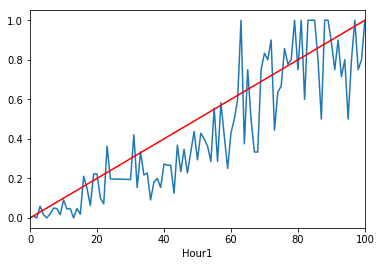

In [23]:
pop_kcmi.groupby('Hour1').mean()['Precip (in)'].plot()
x = np.linspace(0,1,100)
y = x * 100
plt.plot(y, x, '-r', label='x,y')

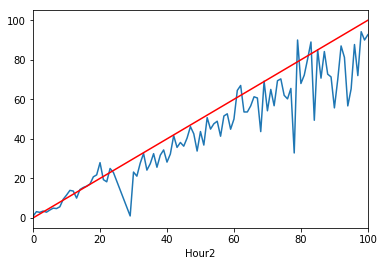

In [24]:
pop_kcmi.groupby('Hour2').mean()['Hour1'].plot()
plt.plot(y , x * 100, '-r', label='x,y')

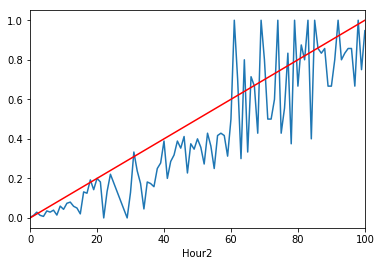

In [25]:
pop_kcmi.groupby('Hour2').mean()['Precip (in)'].plot()
plt.plot(y , x, '-r', label='x,y')

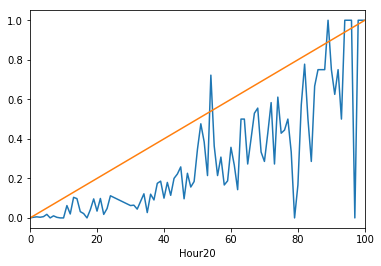

In [26]:
pop_kcmi.groupby('Hour20').mean()['Precip (in)'].plot()
plt.plot(y , x ,label='x,y')

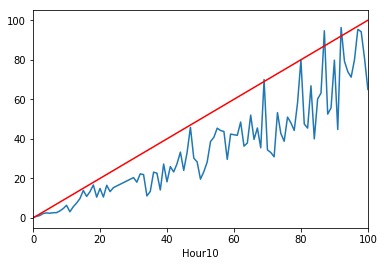

In [27]:
pop_kcmi.groupby('Hour10').mean()['Hour1'].plot()
plt.plot(y , x * 100, '-r', label='x,y')

In [28]:
pop_kcmi = pd.read_csv('Flipped Files/wg-KCMI-pop.csv')
pop_kcmi = merge_pop_replace(kcmi,pop_kcmi)
pop_kcmi_error = get_pop_error(pop_kcmi)
pop_kcmi_error[1].value_counts()

(9688, 244)


/home/guangya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in less
/home/guangya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater_equal


 0.0    8356
-1.0     665
 1.0     226
Name: 1, dtype: int64

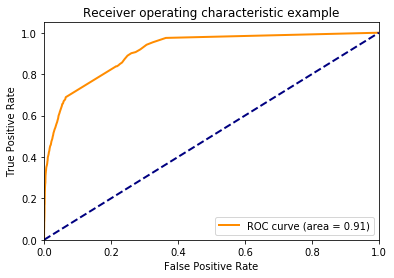

In [33]:
y = pop_kcmi[['Hour1','Precip (in)']].dropna().values
fpr, tpr, thresholds = roc_curve(y[:,1], y[:,0], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

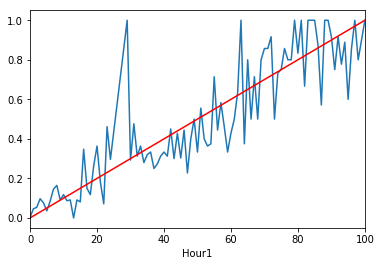

In [34]:
pop_kcmi.groupby('Hour1').mean()['Precip (in)'].plot()
x = np.linspace(0,1,100)
y = x * 100
plt.plot(y, x, '-r', label='x,y')

In [35]:
temp_kcmi_error[0].value_counts()

 0.0     1974
 1.0     1602
-1.0     1491
-2.0      894
 2.0      784
-3.0      512
 3.0      450
-4.0      332
 4.0      293
-5.0      187
 5.0      175
 6.0      127
-6.0      121
-7.0       68
 7.0       56
 8.0       45
-8.0       31
 9.0       28
-9.0       23
-10.0      11
 10.0       9
 11.0       7
-11.0       7
-12.0       6
-14.0       3
 13.0       3
-15.0       2
-16.0       1
 14.0       1
 12.0       1
-13.0       1
Name: 0, dtype: int64

In [36]:
temp_kcmi_error[1].value_counts()

 0.0     1696
 1.0     1467
-1.0     1396
 2.0      952
-2.0      940
-3.0      618
 3.0      514
-4.0      363
 4.0      318
-5.0      244
 5.0      205
 6.0      121
-6.0      109
-7.0       70
 7.0       65
 8.0       49
-8.0       38
 9.0       18
-9.0       16
-10.0      13
-11.0      10
 10.0       9
 11.0       5
-12.0       4
-14.0       2
-16.0       1
-15.0       1
-13.0       1
Name: 1, dtype: int64

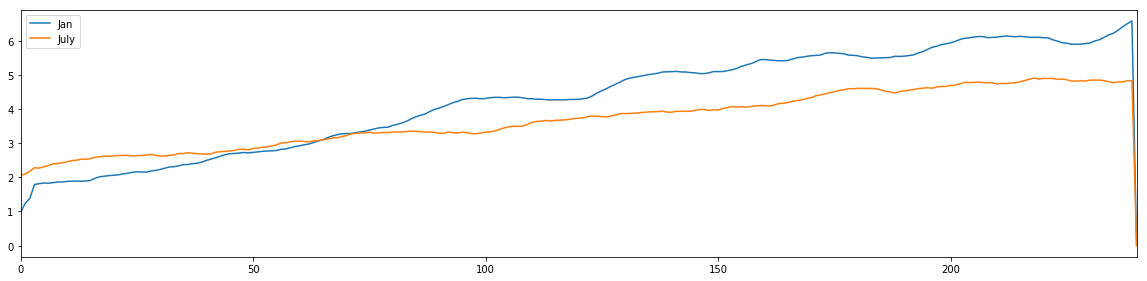

In [37]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
temp_kcmi_error[temp_kcmi_error.index.month == 1].abs().mean().plot(label = 'Jan')
temp_kcmi_error[temp_kcmi_error.index.month == 7].abs().mean().plot(label = 'July')
plt.legend()

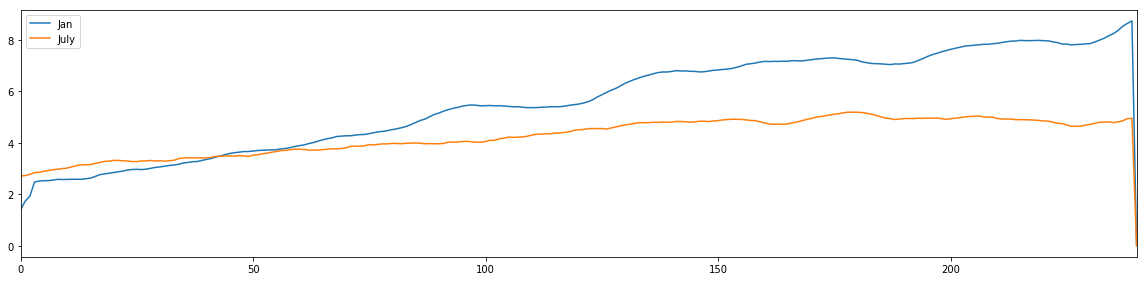

In [38]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
temp_kcmi_error[temp_kcmi_error.index.month == 1].std().plot(label = 'Jan')
temp_kcmi_error[temp_kcmi_error.index.month == 7].std().plot(label = 'July')
plt.legend()

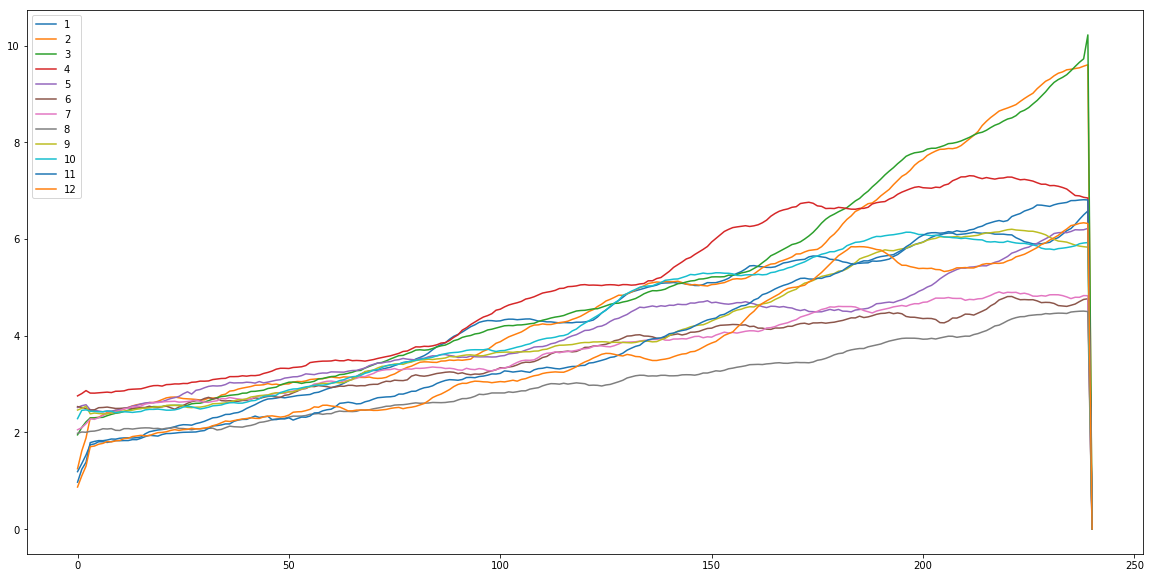

In [39]:
error_month(temp_kcmi_error)

### Chicago

In [40]:
orlando = pd.read_csv('chicago.csv') # have to do some manual work for this
# Make the data be chicago instead
pop_ord = pd.read_csv('Flipped Files/wg-KORD-pop.csv')
temp_ord = pd.read_csv('Flipped Files/wg-KORD-temp.csv')

In [41]:
orlando[orlando['Temp (F)'] == 'M']

/home/guangya/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Date,Time,Temp (F),Precip (in),Unnamed: 4


In [42]:
orlando[orlando['Precip (in)'] == 'm']

,Date,Time,Temp (F),Precip (in),Unnamed: 4
1944,2016-03-22,00:51,40,m,NaN
1945,2016-03-22,01:51,44,m,NaN
1946,2016-03-22,02:51,44,m,NaN
1947,2016-03-22,03:51,43,m,NaN
1948,2016-03-22,04:51,43,m,NaN
1949,2016-03-22,05:51,44,m,NaN
1950,2016-03-22,06:51,45,m,NaN
1951,2016-03-22,07:51,47,m,NaN
1952,2016-03-22,08:51,49,m,NaN
2016,2016-03-25,00:51,30,m,NaN


In [43]:
orlando = clean(orlando)
pop_ord = merge_pop(orlando,pop_ord)
temp_ord = merge_temp(orlando,temp_ord)
temp_ord_error = get_temp_error(temp_ord)

(9687, 244)
(9687, 244)


In [44]:
temp_ord_error[1].value_counts()

 0.0     2006
-1.0     1602
 1.0     1534
-2.0      955
 2.0      811
-3.0      531
 3.0      478
 4.0      281
-4.0      254
-5.0      134
 5.0      131
 6.0       66
-6.0       63
 7.0       35
-7.0       31
 8.0       22
-8.0       15
 9.0       15
-10.0       7
-9.0        5
-11.0       5
-12.0       4
-15.0       4
 10.0       3
-14.0       3
-13.0       2
-18.0       2
 13.0       2
-16.0       1
 11.0       1
-23.0       1
Name: 1, dtype: int64

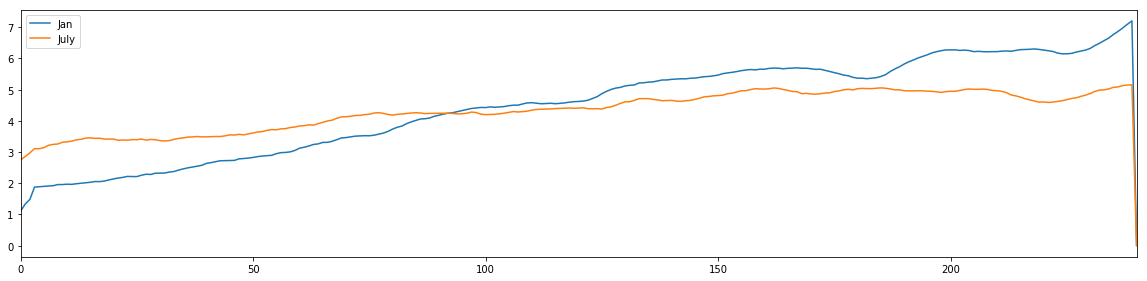

In [45]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
temp_ord_error[temp_ord_error.index.month == 1].std().plot(label = 'Jan')
temp_ord_error[temp_ord_error.index.month == 7].std().plot(label = 'July')
plt.legend()

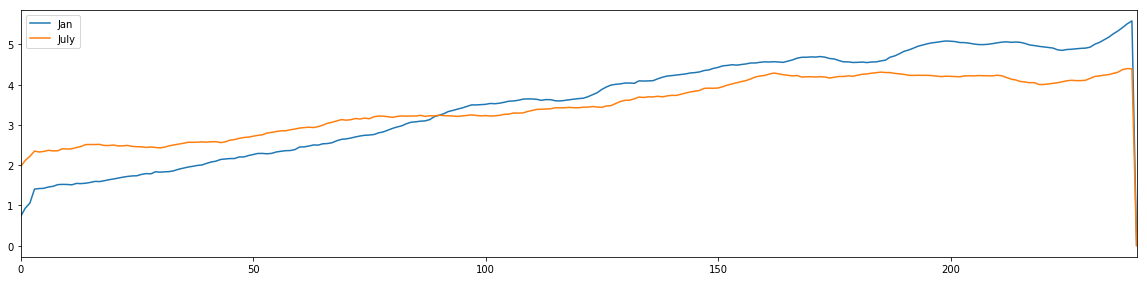

In [46]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
temp_ord_error[temp_ord_error.index.month == 1].abs().mean().plot(label = 'Jan')
temp_ord_error[temp_ord_error.index.month == 7].abs().mean().plot(label = 'July')
plt.legend()

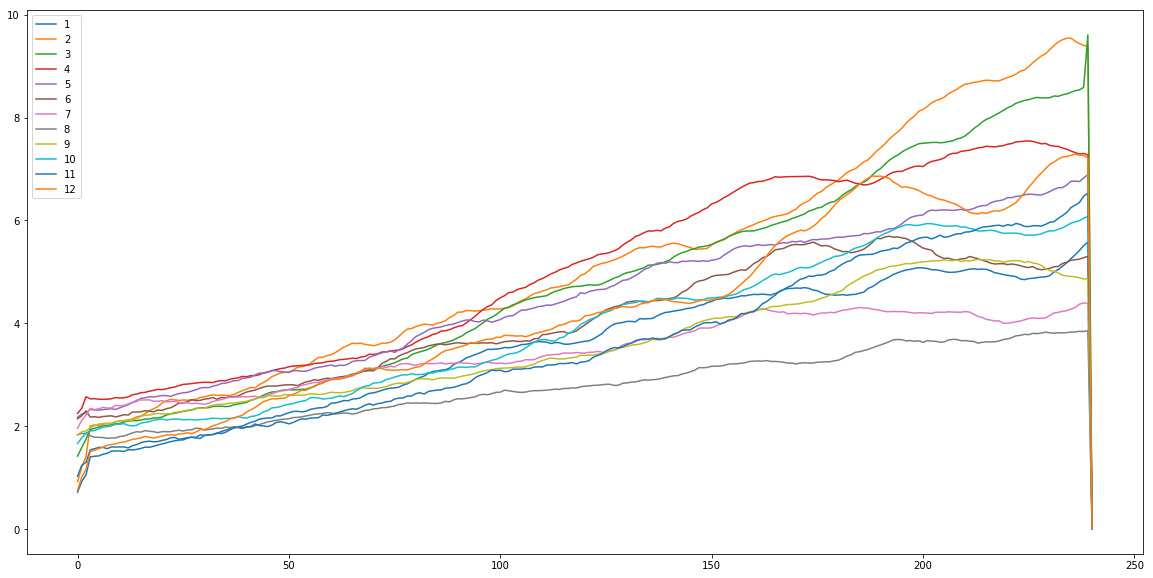

In [47]:
error_month(temp_ord_error)

### Atlanta NOTE: The data in atlanta is quite inaccurate; Still need to figure out the reasons

In [48]:
atlanta = pd.read_csv('atlanta.csv') # have to do some manual work for this
pop_atl = pd.read_csv('Flipped Files/wg-KATL-pop.csv')
temp_atl = pd.read_csv('Flipped Files/wg-KATL-temp.csv')


In [49]:
temp_atl[40:80]

,Location,Variable,Date/Time,Hour1,Hour2,Hour3,Hour4,Hour5,Hour6,Hour7,...,Hour231,Hour232,Hour233,Hour234,Hour235,Hour236,Hour237,Hour238,Hour239,Hour240
40,KATL,Temp,2016-05-04-15,70.0,70.0,70.0,71.0,72.0,72.0,71.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,KATL,Temp,2016-05-04-16,71.0,70.0,70.0,72.0,72.0,72.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,KATL,Temp,2016-05-04-17,70.0,71.0,72.0,72.0,72.0,72.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,KATL,Temp,2016-05-04-18,70.0,70.0,71.0,71.0,71.0,71.0,71.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,KATL,Temp,2016-05-04-19,67.0,68.0,69.0,69.0,70.0,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,KATL,Temp,2016-05-04-20,67.0,65.0,67.0,67.0,67.0,67.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,KATL,Temp,2016-05-04-21,65.0,64.0,65.0,65.0,65.0,64.0,64.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,KATL,Temp,2016-05-04-22,62.0,62.0,63.0,63.0,62.0,62.0,62.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,KATL,Temp,2016-05-04-23,57.0,59.0,59.0,59.0,59.0,60.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,KATL,Temp,2016-05-05-00,55.0,57.0,58.0,59.0,59.0,58.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
atlanta[3000:]

,Date,Time,Temp (F),Precip (in),Unnamed: 4
3000,2016-05-05,00:53,43,0.00,NaN
3001,2016-05-05,01:53,42,0.00,NaN
3002,2016-05-05,02:53,40,0.00,NaN
3003,2016-05-05,03:53,41,0.00,NaN
3004,2016-05-05,04:53,41,0.00,NaN
3005,2016-05-05,05:53,42,0.00,NaN
3006,2016-05-05,06:53,44,0.00,NaN
3007,2016-05-05,07:53,46,0.00,NaN
3008,2016-05-05,08:53,52,0.00,NaN
3009,2016-05-05,09:53,56,0.00,NaN


In [51]:
temp_atl.head()

,Location,Variable,Date/Time,Hour1,Hour2,Hour3,Hour4,Hour5,Hour6,Hour7,...,Hour231,Hour232,Hour233,Hour234,Hour235,Hour236,Hour237,Hour238,Hour239,Hour240
0,KATL,Temp,2016-05-02-23,72.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KATL,Temp,2016-05-03-00,71.0,69.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KATL,Temp,2016-05-03-01,68.0,70.0,69.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KATL,Temp,2016-05-03-02,68.0,68.0,69.0,69.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KATL,Temp,2016-05-03-03,68.0,68.0,68.0,67.0,68.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
atlanta = clean(atlanta)
pop_atl = merge_pop(atlanta,pop_atl)
temp_atl = merge_temp(atlanta,temp_atl)
temp_atl_error = get_temp_error(temp_atl)

(8252, 244)
(8252, 244)


In [53]:
temp_atl_error

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,240
Date/Time,,,,,,,,,,,,,,,,,,,,,
2016-05-02 23:00:00,-27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2016-05-03 00:00:00,-26.0,-24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2016-05-03 01:00:00,-26.0,-28.0,-27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2016-05-03 02:00:00,-24.0,-24.0,-25.0,-25.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2016-05-03 03:00:00,-25.0,-25.0,-25.0,-24.0,-25.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2016-05-03 04:00:00,-24.0,-25.0,-25.0,-25.0,-25.0,-26.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2016-05-03 05:00:00,-22.0,-22.0,-22.0,-22.0,-22.0,-22.0,-22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2016-05-03 06:00:00,-21.0,-21.0,-21.0,-21.0,-21.0,-21.0,-21.0,-21.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2016-05-03 07:00:00,-14.0,-14.0,-14.0,-15.0,-15.0,-15.0,-14.0,-15.0,-15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


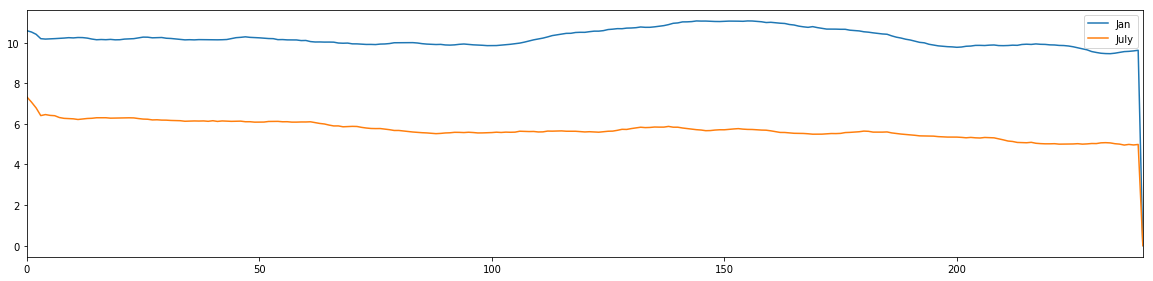

In [54]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
temp_atl_error[temp_atl_error.index.month == 1].std().plot(label = 'Jan')
temp_atl_error[temp_atl_error.index.month == 7].std().plot(label = 'July')
plt.legend()

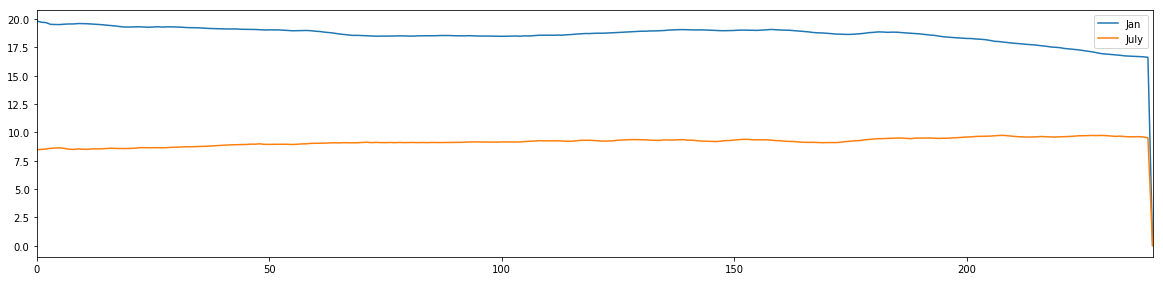

In [55]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
temp_atl_error[temp_atl_error.index.month == 1].abs().mean().plot(label = 'Jan')
temp_atl_error[temp_atl_error.index.month == 7].abs().mean().plot(label = 'July')
plt.legend()

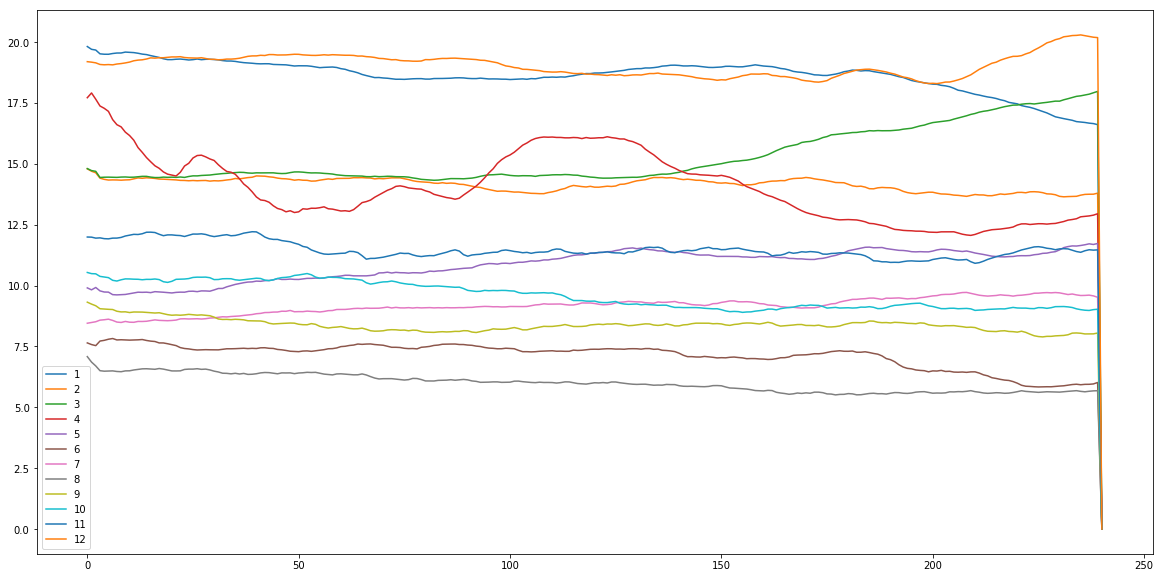

In [56]:
error_month(temp_atl_error)

### Check accuarcy for climate center data

In [57]:
# I think we should expect the precip column has a sligheter larger amount of 1 since we decided to take > 0 be rainy, which is a very low cutoff.

In [58]:
len(pop_kcmi[pop_kcmi['Hour1'] <= 50])

8806

In [59]:
len(pop_kcmi[pop_kcmi['Hour1'] > 90])

109

In [60]:
arr = np.zeros(240)
for i in range(1,240):
    arr[i-1] = len(pop_kcmi[pop_kcmi['Hour' + str(i)] > 90])

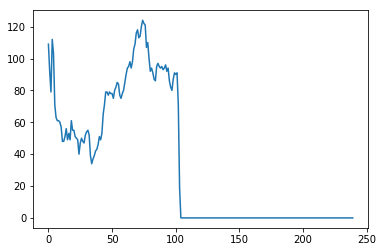

In [61]:
plt.plot(arr)

In [62]:
pop_kcmi

,Location,Variable,Date/Time,Hour1,Hour2,Hour3,Hour4,Hour5,Hour6,Hour7,...,Hour232,Hour233,Hour234,Hour235,Hour236,Hour237,Hour238,Hour239,Hour240,Precip (in)
0,KCMI,PoP,2016-03-03 19:00:00,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,KCMI,PoP,2016-03-03 20:00:00,1.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,KCMI,PoP,2016-03-03 21:00:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,KCMI,PoP,2016-03-03 22:00:00,0.0,0.0,0.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,KCMI,PoP,2016-03-03 23:00:00,0.0,0.0,0.0,0.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,KCMI,PoP,2016-03-04 00:00:00,0.0,0.0,0.0,0.0,3.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,KCMI,PoP,2016-03-04 01:00:00,0.0,0.0,1.0,2.0,2.0,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,KCMI,PoP,2016-03-04 02:00:00,0.0,0.0,0.0,2.0,3.0,3.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,KCMI,PoP,2016-03-04 03:00:00,0.0,0.0,0.0,2.0,3.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,KCMI,PoP,2016-03-04 04:00:00,0.0,0.0,0.0,2.0,3.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [63]:
pop_kcmi['Precip (in)'].value_counts() # The pop data is reasonable

0    8901
1     787
Name: Precip (in), dtype: int64

In [64]:
# have'nt decided an error function for pop, will update more once defined.

In [65]:
temp_kcmi_error[1].value_counts()

 0.0     1696
 1.0     1467
-1.0     1396
 2.0      952
-2.0      940
-3.0      618
 3.0      514
-4.0      363
 4.0      318
-5.0      244
 5.0      205
 6.0      121
-6.0      109
-7.0       70
 7.0       65
 8.0       49
-8.0       38
 9.0       18
-9.0       16
-10.0      13
-11.0      10
 10.0       9
 11.0       5
-12.0       4
-14.0       2
-16.0       1
-15.0       1
-13.0       1
Name: 1, dtype: int64

In [66]:
temp_kcmi_error[temp_kcmi_error.index.month == 7][1].value_counts()

-1.0     117
 1.0     115
 0.0     110
-2.0      71
 2.0      69
-3.0      65
 3.0      46
-4.0      45
 4.0      31
 5.0      19
-5.0      14
-6.0      11
-7.0       6
 6.0       6
-8.0       3
 8.0       2
 9.0       1
-10.0      1
-13.0      1
-9.0       1
Name: 1, dtype: int64

In [67]:
temp_kcmi_error[temp_kcmi_error.index.month == 1][1].value_counts()

 0.0    209
 1.0    176
-1.0    120
 2.0     76
-2.0     54
-3.0     34
 3.0     19
-4.0     15
-5.0     13
 4.0      6
-7.0      2
 5.0      2
-6.0      2
Name: 1, dtype: int64

In [68]:
temp_kcmi_error[1].mean()

-0.07182260681449432

In [69]:
temp_kcmi_error[1].std()

2.781964029772223

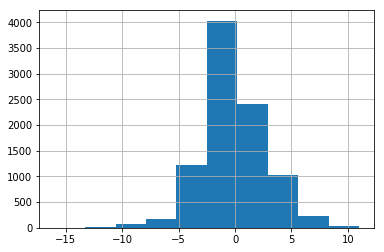

In [70]:
temp_kcmi_error[1].hist()

In [71]:
len(pop_atl[pop_atl['Hour1'] > 50])

266

In [72]:
pop_atl['Precip (in)'].value_counts()

0    7475
1     390
Name: Precip (in), dtype: int64

In [73]:
temp_atl_error[1].value_counts()

-11.0    340
-10.0    336
-8.0     334
-7.0     328
-12.0    327
-9.0     325
-6.0     318
-4.0     302
-5.0     294
-13.0    277
-14.0    271
-15.0    261
-3.0     261
-16.0    258
-2.0     237
-17.0    225
-18.0    192
-1.0     191
-19.0    187
 0.0     170
-20.0    165
 1.0     156
 2.0     137
-22.0    135
-21.0    131
-25.0    107
 3.0     107
-24.0    106
-23.0    103
-26.0    101
        ... 
 8.0      26
-35.0     26
-34.0     24
 9.0      22
-36.0     20
-37.0     19
-42.0     15
-39.0     15
 10.0     14
 11.0     14
-38.0      8
-40.0      8
-43.0      8
 13.0      8
 14.0      7
 12.0      6
-41.0      6
-44.0      6
-45.0      4
 15.0      3
-47.0      2
-49.0      2
-58.0      2
-46.0      2
-63.0      1
-53.0      1
-56.0      1
-62.0      1
-50.0      1
-59.0      1
Name: 1, Length: 71, dtype: int64

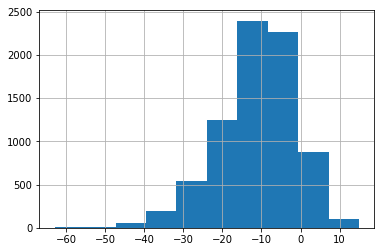

In [74]:
temp_atl_error[1].hist()

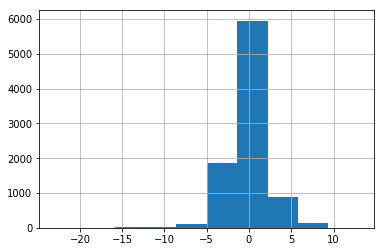

In [75]:
temp_ord_error[1].hist()

In [76]:
len(pop_ord[pop_ord['Hour1'] > 50])

599

In [77]:
pop_ord['Precip (in)'].value_counts() # this is certainly a bad estimation

0    8955
1     692
Name: Precip (in), dtype: int64